# **Analyzing the Data in Ford's GoBike Program**
## By Hana Hilmy

## Investigation Overview

> I will do data analysis on the Ford GoBike dataset. To explore the dataset's variables and comprehend the data's connections, I will utilize data visualization packages. This section's investigation progresses from simple univariate relationships to multivariate relationships.

## Dataset Overview

> There are 183,412 bike trips in the dataset with 16 features. However, the dataset contains some missing information. There are only 174,952 bike trips with complete information.  


*   duration (numeric) 
*   start time (datetime)
*   end time (datetime) 
*   start station information such as id, name, latitude, longitude (object)
*   end station information such as id, name, latitude, longitude (object)
*   bike id (numeric) 
*   user type (categorical): Subscriber or Customer 
*   member birth year (float)
*   member gender (categorical): Male, Female, Other 
*   bike share (object/binary) 



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = (4,3)



In [3]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('https://raw.githubusercontent.com/MohanadMagdy99/datasciencetest/main/201902-fordgobike-tripdata%20(1).csv')
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.dropna(subset=['member_gender'], how='all', inplace=True)
df.dropna(subset=['member_birth_year'], how='all', inplace=True)

df.dropna(subset=['end_station_id'], how='all', inplace=True)
df.dropna(subset=['end_station_name'], how='all', inplace=True)

df.dropna(subset=['start_station_name'], how='all', inplace=True)
df.dropna(subset=['start_station_id'], how='all', inplace=True)

In [6]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df['member_gender'] = df['member_gender'].astype('category')
df['user_type'] = df['user_type'].astype('category')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Duration of Bike Trips in General

> To begin with, I was simply interested as to how many rides were taken in total. The graphic below shows that the peak of rides lasts around 550 seconds. 


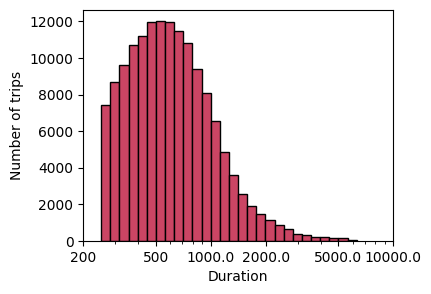

In [7]:
# change graph into log format 
duration_filter = df.query('duration_sec < 6000')
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(duration_filter['duration_sec'].max())+log_binsize, log_binsize)
plt.hist(data = duration_filter, x = 'duration_sec', bins = bins, color='#cb4564', edgecolor='black')
plt.xscale('log')
tick_locs = [200, 500, 1e3, 2e3, 5e3, 1e4] 
plt.xticks(tick_locs, tick_locs)
plt.xlabel('Duration')
plt.ylabel('Number of trips')

plt.show()


## Distribution of Age in Members in General

> Peak of member birth year is roughly around 1985 which means that the peak of age of members is around 35 years old.  

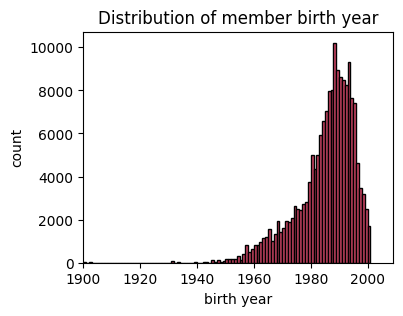

In [8]:
binsize = 1
bins = np.arange(0, df['member_birth_year'].max()+binsize, binsize)
plt.hist(data = df, x = 'member_birth_year', bins = bins, color='#cb4564',edgecolor='black')
plt.title('Distribution of member birth year')
plt.xlabel('birth year')
plt.ylabel('count')
plt.xlim(1900, 2009)
plt.show()


## Distribution of Gender in Members in General
> The graph shows that 75% of members (most members) are males then 23% of members are female. The graph shows that the other members are less than 2%.


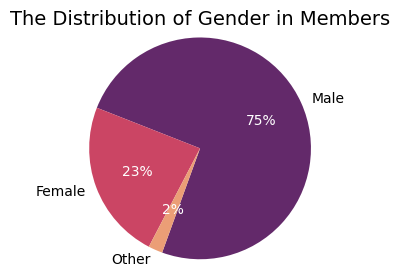

In [9]:
UserTypes_Count = df['member_gender'].value_counts()
UserTypes_Count = UserTypes_Count[:3]
palette=['#63296A','#cb4564', '#eb9e76']
_, _, autotexts = plt.pie(UserTypes_Count[:3], labels = UserTypes_Count.index, autopct='%1.0f%%', radius = 1.2, startangle = 250, colors=palette)
for autotext in autotexts:
    autotext.set_color('white')

plt.title("The Distribution of Gender in Members",fontsize=14)
plt.axis('off');
plt.show()

## Distribution of Gender in Members in General
> The graph shows that subscribers are around 150000 while customers are less than 25000 of members. 


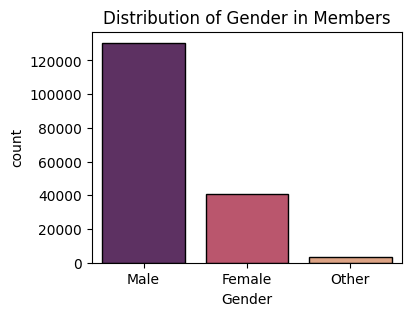

In [10]:
# distribution of gender in members
order = ['Male', 'Female', 'Other']
palette=['#63296A','#cb4564', '#eb9e76']
sb.countplot(data=df, x='member_gender', order=order, edgecolor='black', palette=palette)
plt.title('Distribution of Gender in Members')
plt.xlabel('Gender');
plt.show()


## How the 2 Categories Genders and Member Types Influence Duration and Age
> For different user types both are appearing comparative patterns for age and trip duration, however, there is a minor higher age bias for subscribers with longer trip durations. The quantity of longer-duration trips is greater for males, but the proportion is higher for women and others; moreover, others have one more peak at roughly the age of 55 for longer-duration trips. 


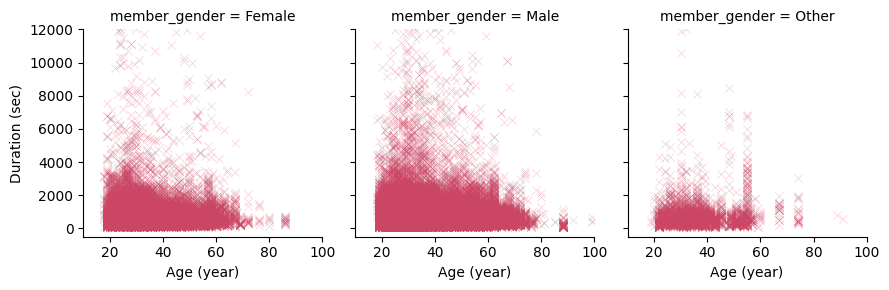

In [11]:
base_color = '#cb4564'

df['age'] = (2019 - df['member_birth_year'])
genders = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 3, size = 3,
                 xlim = [10, 100], ylim = [-500, 12000])
genders.map(sb.scatterplot, 'age', 'duration_sec', alpha=0.25,color=base_color, marker="x")
genders.set_xlabels('Age (year)')
genders.set_ylabels('Duration (sec)')

plt.show()


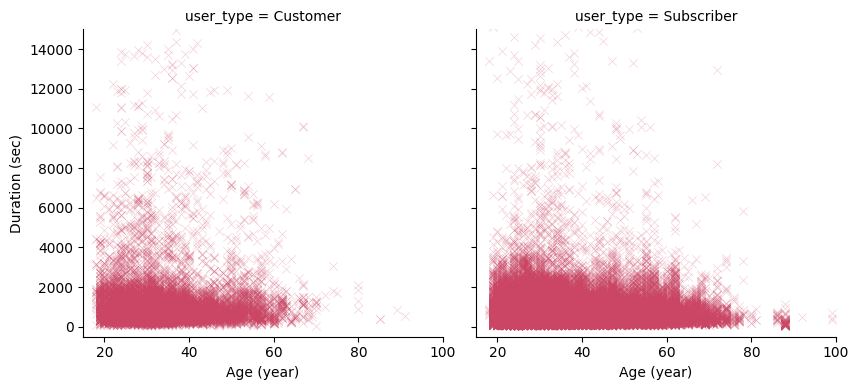

In [12]:
user_types = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 10, size = 4,
                 xlim = [15, 100], ylim = [-500, 15000])
user_types.map(sb.scatterplot, 'age', 'duration_sec', alpha=0.25,color ='#cb4564', marker="x")
user_types.set_xlabels('Age (year)')
user_types.set_ylabels('Duration (sec)')

plt.show()

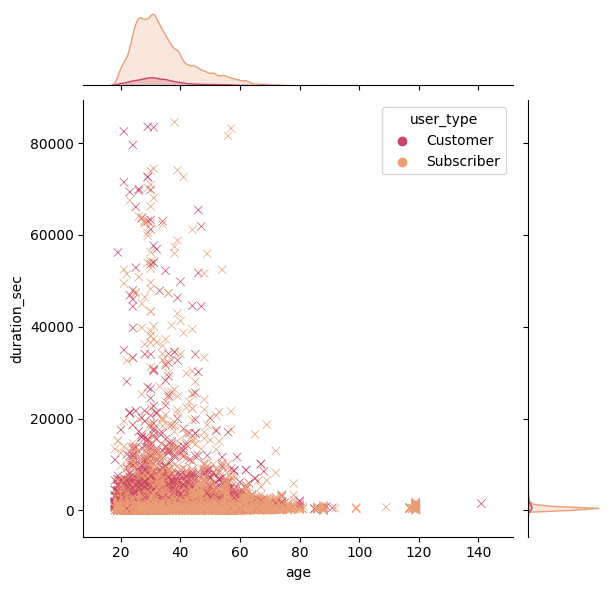

In [19]:
ax=sb.jointplot(data=df, x="age",y="duration_sec",hue ="user_type",palette=['#cb4564', '#eb9e76'], marker="x")
ax
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!